In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
concrete= pd.read_csv('Concrete_Data.csv',names=['cement','slag','ash','water','superplastic','coarseagg','fineagg', 'age','strength'])


In [15]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [16]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [17]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
min_max_scaler= MinMaxScaler()

In [23]:
concrete = pd.DataFrame(min_max_scaler.fit_transform(concrete), columns=['cement','slag','ash','water','superplastic','coarseagg','fineagg', 'age','strength'] )

In [24]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409054,0.205608,0.270800,0.477576,0.192643,0.499763,0.450524,0.122698,0.417181
std,0.238601,0.240064,0.319822,0.170504,0.185512,0.226029,0.201143,0.173544,0.208125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.344511,0.000000,0.380814,0.343578,0.016484,0.266301
50%,0.390183,0.061213,0.000000,0.504990,0.197205,0.485465,0.465404,0.074176,0.400050
75%,0.566210,0.397746,0.591054,0.560878,0.315528,0.663953,0.577020,0.151099,0.545732
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X= concrete.drop('strength', axis=1)

In [28]:
y= concrete['strength']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
from sklearn.neural_network import MLPRegressor

In [33]:
model= MLPRegressor(hidden_layer_sizes=(1,))

In [34]:
model.fit( X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
model.n_layers_

3

In [43]:
predictions= model.predict(X_test)
print(predictions)

[ 0.09487643  0.60430434  0.65887549  0.60819067  0.46931616  0.55590281
  0.44336207  0.26579353  0.30472732  0.34358884  0.31894529  0.2355509
  0.84036517  0.66202003  0.35398319  0.52139869  0.57187241  0.40425945
  0.56323938  0.40270848  0.37405703  0.1477784   0.40309658  0.39170168
  0.34717163  0.36909679  0.11935286  0.43170847  0.27471464  0.35844703
  0.26665202  0.40382687  0.39853002  0.21213203  0.41210805  0.51345331
  0.28880647  0.51890479  0.33016052  0.3810789   0.22746383  0.30797724
  0.23244578  0.57757454  0.35687614  0.58022643  0.64719342 -0.03396397
  0.30959563  0.33767215  0.55228501  0.28605334  0.62878821  0.37594267
  0.53234822  0.63172023  0.31832945  0.14979373  0.22604991  0.13147616
  0.51468587  0.39165243  0.26263277  0.63934873  0.3274321   0.31189341
  0.54958887  0.263058    0.35399833  0.37052604  0.3425285   0.29380368
  0.27797129  0.31901088  0.37788018  0.36764676  0.10261754  0.28622256
  0.75287599  0.28158378  0.11350024  0.62037902  0.

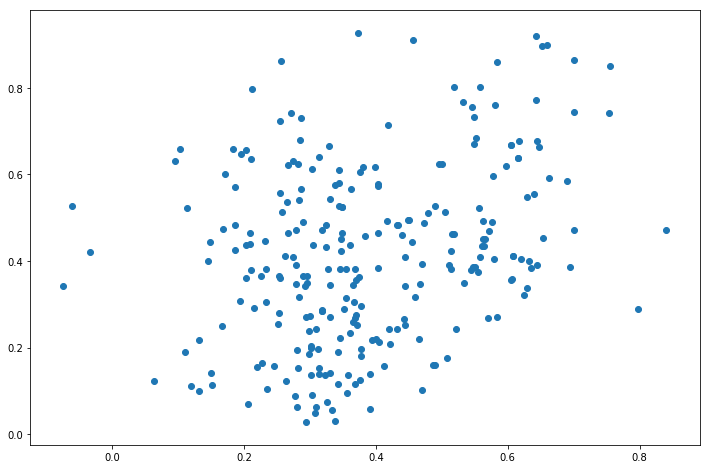

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(predictions, y_test)

In [62]:
np.corrcoef(predictions, y_test)

array([[ 1.        ,  0.30763283],
       [ 0.30763283,  1.        ]])

In [67]:
model= MLPRegressor(hidden_layer_sizes=(10,))

In [68]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [69]:
predictions2 = model.predict(X_test) 

In [70]:
np.corrcoef(predictions2, y_test)

array([[ 1.       ,  0.7378899],
       [ 0.7378899,  1.       ]])

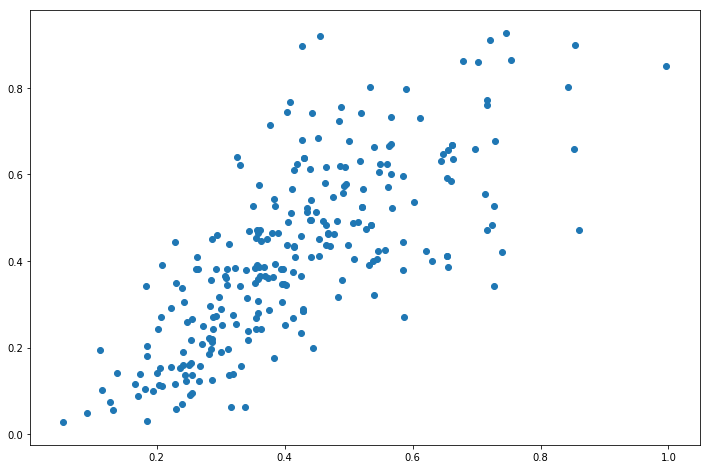

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(predictions2, y_test)

In [72]:
model= MLPRegressor()

In [73]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
predictions3 = model.predict(X_test)

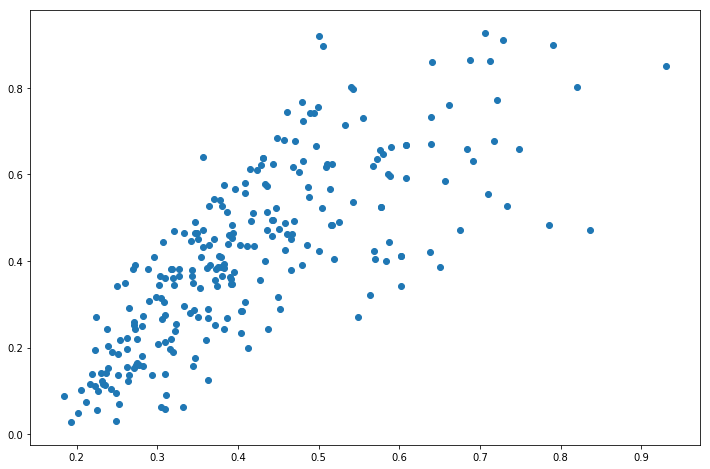

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(predictions3, y_test)

In [79]:
np.corrcoef(predictions3, y_test)

array([[ 1.        ,  0.76247951],
       [ 0.76247951,  1.        ]])